In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from collections import Counter
import re

import nltk
from nltk.corpus import stopwords

from scipy.stats import ttest_ind
from scipy import stats
import scipy.stats as st

# Abstract

In this survey three datasets are examined from Kaggle.com, named: **Food choices**, **Foodborne Disease Outbreaks** and **Open Food Facts**. The mile stones of creating a basic **data science project** are covered - a *data tiding, visualizing, exploring, analyzing, and forming and a try of testing a hypothesis*. 

Leading question of the notebook is **how much sugar do we eat with our favorite food and how much that make us sick.** 

The main used dataset **Open Food Facts** is about chemical components of different foods from all around the world. The focus is sugar content. Second dataset **Food choices** contains data for 125 college students. Here we focus on their comfort food preferences and do a little NLP analysis. Third dataset **Foodborne Disease Outbreaks** is related to reported food poisoning in between 1998-2015 and the consumed food. Applied writing style is easy to read, not very professional.


## Related Previous Researches
In References could be found links to Jupyter Notebooks used for creating some of the functions here. 
This notebook is extension of Kaggle notebook How much sugar and salt do we eat (see References). Kaggle notebook describes mainly distribution of sugar consumption all over the world.

## Introduction
In this survey I want to look deeper into three data sets from Kaggle.com, named: Food choices, Foodborne Disease Outbreaks and the biggest one - Open Food Facts. All they are related to food somehow but also are connected to different topics. 
The main idea is going through the complete process of a data mining as far as I have learned it in my Data Science course at Soft Uni.

So first of all, let us read the datasets including the huge one and look at their shapes, columns, etc.

### I. Reading and Describing Datasets

In [4]:
# Open Food Facts Data Set
food_data = pd.read_table("data/en.openfoodfacts.org.products.tsv", low_memory=False)

# Food choices Data Set
students_data = pd.read_csv("data/food_coded.csv", sep=",")

# Foodborne Disease Outbreaks Data Set
disease_data = pd.read_csv("data/outbreaks.csv")

In [5]:
food_data.shape

(356027, 163)

In [6]:
food_data.head(4)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN


In [7]:
food_data.dtypes

code                                     object
url                                      object
creator                                  object
created_t                                object
created_datetime                         object
last_modified_t                          object
last_modified_datetime                   object
product_name                             object
generic_name                             object
quantity                                 object
packaging                                object
packaging_tags                           object
brands                                   object
brands_tags                              object
categories                               object
categories_tags                          object
categories_en                            object
origins                                  object
origins_tags                             object
manufacturing_places                     object
manufacturing_places_tags               

In [8]:
students_data.shape

(125, 61)

In [9]:
students_data.head(4)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"


In [10]:
students_data.describe

<bound method NDFrame.describe of          GPA  Gender  breakfast  calories_chicken  calories_day  \
0        2.4       2          1               430           NaN   
1      3.654       1          1               610           3.0   
2        3.3       1          1               720           4.0   
3        3.2       1          1               430           3.0   
4        3.5       1          1               720           2.0   
5       2.25       1          1               610           3.0   
6        3.8       2          1               610           3.0   
7        3.3       1          1               720           3.0   
8        3.3       1          1               430           NaN   
9        3.3       1          1               430           3.0   
10       3.5       1          1               610           3.0   
11     3.904       1          1               720           4.0   
12       3.4       2          1               430           3.0   
13       3.6       1        

In [11]:
disease_data.shape

(19119, 12)

In [12]:
disease_data.head(4)

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0


In [13]:
disease_data.info

<bound method DataFrame.info of        Year     Month           State                               Location  \
0      1998   January      California                             Restaurant   
1      1998   January      California                                    NaN   
2      1998   January      California                             Restaurant   
3      1998   January      California                             Restaurant   
4      1998   January      California                 Private Home/Residence   
5      1998   January      California                             Restaurant   
6      1998   January      California                             Restaurant   
7      1998   January      California                             Restaurant   
8      1998   January        Colorado                             Restaurant   
9      1998   January        Colorado                             Restaurant   
10     1998   January        Colorado                          Grocery Store   
11     1

Obviously, the first one `food_data` is enormously big (~1 GB) and over 160 features, 300K observations, so let's start digging it first. We expect not all columns to be visible at run of `food_data.columns`. Instead of that we simply print each of 163 dataset columns one by one.

In [14]:
for col in food_data.columns:
    print(col)

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
generic_name
quantity
packaging
packaging_tags
brands
brands_tags
categories
categories_tags
categories_en
origins
origins_tags
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_en
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_en
ingredients_text
allergens
allergens_en
traces
traces_tags
traces_en
serving_size
no_nutriments
additives_n
additives
additives_tags
additives_en
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutrition_grade_uk
nutrition_grade_fr
pnns_groups_1
pnns_groups_2
states
states_tags
states_en
main_category
main_category_en
image_url
image_small_url
energy_100g
energy-from-fat_100g
fat_100g
saturated-fat_100g
-buty

### II. Data Cleaning

In a flash look, we could tell what is in this dataset `food_data` - food, its origin, packaging, chemical composition. We could assume that not every food contains all of the possible chemical composites, presented in this dataset, so let's check for empty at all cells around. Empty cells make the dataset enormous without any reason. Features with no observations or products with no name are not suitable for a proper data research. We want to make our job easier and we write some code about cleaning those.

Firstly, we clean features with no observation in it. Then we remove products with no name. We don't need poorly named products because our main goal is to examine food by name, and only then by chemical compositions.

In [15]:
# Amount of NaN values for each feature
nan_cells = food_data.isnull()
all_nan_cells = nan_cells.sum()
sorted_all_nan_cells = all_nan_cells.sort_values(ascending = False)
total_cells = food_data.isnull().count()

# Percentage part of total
percent = (sorted_all_nan_cells / total_cells * 100).round(2)

# Merge series
nan_data = pd.concat({"Qnty of NaN's": sorted_all_nan_cells, '% of Total': percent}, axis=1)

In [16]:
nan_data.head(10)

,% of Total,Qnty of NaN's
-alpha-linolenic-acid_100g,99.94,355826
-arachidic-acid_100g,99.99,356000
-arachidonic-acid_100g,100.00,356018
-behenic-acid_100g,99.99,356001
-butyric-acid_100g,100.00,356027
-capric-acid_100g,100.00,356025
-caproic-acid_100g,100.00,356027
-caprylic-acid_100g,100.00,356026
-cerotic-acid_100g,100.00,356027
-dihomo-gamma-linolenic-acid_100g,99.99,356001


In [17]:
criteria = nan_data["% of Total"] == 100 
print("Number of features with no data: ~" + str(nan_data[criteria].count()[0]))

Number of features with no data: ~30


In [18]:
food_data.dropna(axis = 1, how = 'all', inplace = True) # drop all empty columns/features 

In [19]:
print("initial dataset shape was (356027, 163) -> now is {}".format(food_data.shape))

initial dataset shape was (356027, 163) -> now is (356027, 147)


In [20]:
print(nan_data[nan_data.index == "product_name"])
column_product_name = food_data["product_name"]
print('Empty Product names: {}'.format(column_product_name.isnull().sum()))

              % of Total  Qnty of NaN's
product_name        4.92          17512
Empty Product names: 17512


In [21]:
food_data = food_data[food_data.product_name.notnull()] # drop all products without names

The dataset `food_data` is now a little more acceptable to work with and we could start digging in it. 

Besides `product_name` feature we have something called `pnns_groups_1` and `pnns_groups_2` which appears to be some sort of grouping. All foods are grouped in some main categories and then in some subcategories. The main groups need cleaning by hand. We rewrite the names with dashes to make them the same as these without dashes.

In [22]:
print(food_data.pnns_groups_1.unique())
print()
print(food_data.pnns_groups_2.unique())

[nan 'unknown' 'Fruits and vegetables' 'Sugary snacks'
 'Cereals and potatoes' 'Beverages' 'Composite foods' 'Fish Meat Eggs'
 'Fat and sauces' 'Milk and dairy products' 'fruits-and-vegetables'
 'Salty snacks' 'sugary-snacks' 'cereals-and-potatoes' 'salty-snacks']

[nan 'unknown' 'Vegetables' 'Biscuits and cakes' 'Bread' 'Legumes'
 'Sweetened beverages' 'Pizza pies and quiche' 'Meat' 'Sweets'
 'Non-sugared beverages' 'Alcoholic beverages' 'Dressings and sauces'
 'Ice cream' 'Cheese' 'One-dish meals' 'vegetables' 'Appetizers'
 'Chocolate products' 'Soups' 'Fruits' 'Cereals' 'Milk and yogurt' 'Fats'
 'Sandwich' 'Artificially sweetened beverages' 'Fruit juices' 'Nuts'
 'Breakfast cereals' 'Eggs' 'Fish and seafood' 'Dried fruits'
 'Processed meat' 'Potatoes' 'pastries' 'Dairy desserts' 'Fruit nectars'
 'Tripe dishes' 'fruits' 'Salty and fatty products' 'cereals' 'legumes'
 'nuts']


In [23]:
spell_check = {}
spell_check['cereals-and-potatoes']  = 'cereals and potatoes'
spell_check['fruits-and-vegetables'] = 'fruits and vegetables'
spell_check['sugary-snacks'] = 'sugary snacks'
spell_check['salty-snacks'] = 'salty snacks'
food_data['pnns_groups_1'] = food_data['pnns_groups_1'].replace(spell_check)
food_data['pnns_groups_1'] = food_data['pnns_groups_1'].str.lower()
food_data['pnns_groups_2'] = food_data['pnns_groups_2'].str.lower()

### III. Grouping and Presenting Data

We create a function that extracts observations by given feature in given groups. This helps us to go easily throughout all the data and select these food containing mostly sugars. On purpose we choose to go first with `sugary snacks`. We dive into the deep.

In [24]:
def extract_observs(group, subgroup, feature):
    condition = (group.get_group(subgroup)[feature].notnull()) & (group.get_group(subgroup)[feature] > 0)
    features_observations = group.get_group(subgroup)[condition][feature]
    return features_observations.values

In [25]:
grouped_by_group1 = food_data.groupby("pnns_groups_1")  # extracing sugary snacks data only
sweets_grouped = grouped_by_group1.get_group("sugary snacks").groupby("pnns_groups_2")

A little step away is checking how much sugar there is in composite foods - not very interesting data - so let us stick to the firstly chosen sugary snacks.

In [36]:
other_meals__grouped = grouped_by_group1.get_group("composite foods").groupby("pnns_groups_2")

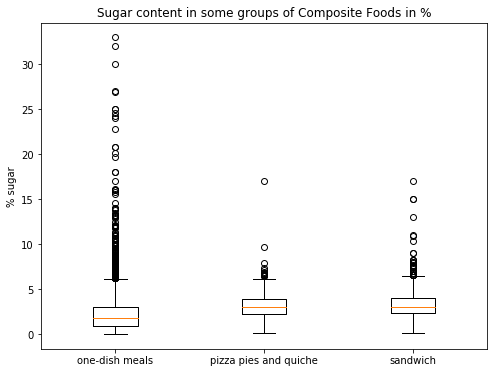

In [37]:
sugar_content_by_subgroups = {}
for eachgroup in other_meals__grouped:
    sugar_content_by_subgroups[eachgroup[0]] = extract_observs(other_meals__grouped, eachgroup[0], "sugars_100g")
labels, data = [*zip(*sugar_content_by_subgroups.items())]  # 'transpose' items to parallel key, value lists
plt.figure(figsize=(8, 6))
plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels)
plt.title("Sugar content in some groups of Composite Foods in %")
plt.ylabel("% sugar")
plt.show()

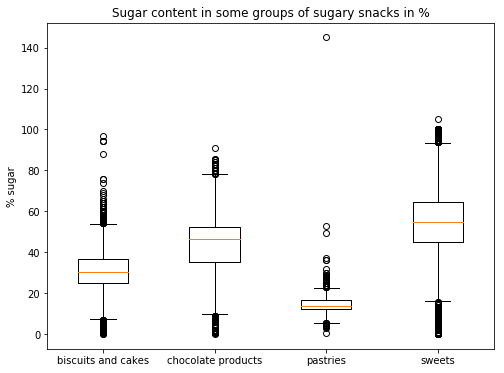

In [38]:
sugar_content_by_subgroups = {}
for eachgroup in sweets_grouped:
    sugar_content_by_subgroups[eachgroup[0]] = extract_observs(sweets_grouped, eachgroup[0], "sugars_100g")
labels, data = [*zip(*sugar_content_by_subgroups.items())]  # 'transpose' items to parallel key, value lists
plt.figure(figsize=(8, 6))
plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels)
plt.title("Sugar content in some groups of sugary snacks in %")
plt.ylabel("% sugar")
plt.show()

Strange here is **more then 100% sugars, even 140%** in some foods. Let's remove this garbage data.

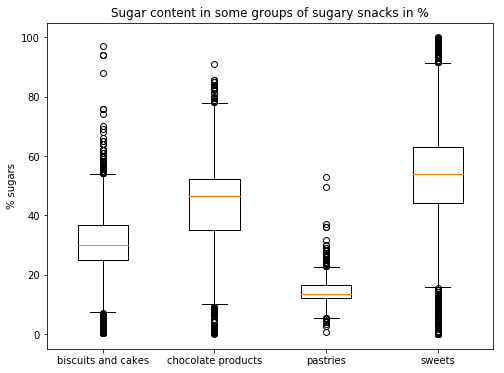

In [39]:
normal_data = []
for arr in data:
    arr = [i for i in arr if i < 100] # Remove outliers with more than 99 g sugar per 100 g weight. 
    normal_data.append(arr)
    
plt.figure(figsize=(8, 6))
plt.boxplot(normal_data)
plt.xticks(range(1, len(labels) + 1), labels)
plt.ylabel("% sugars")
plt.title("Sugar content in some groups of sugary snacks in %")
plt.show()

In [40]:
count = 0
for label in labels:
    print("Subgroup name: " + label)
    print("    Mean: {}".format(round(np.mean(normal_data[count]),2)))
    print("    Standart Devaition: {}".format(round(np.std(normal_data[count]),2)))
    print("    Median: {}".format(round(np.median(normal_data[count]),2)))
    print("    Mode: {}".format(stats.mode(normal_data[count])[0][0]))
    print("    Skewness: {}".format(round(stats.skew(normal_data[count]),2)))
    
    print()
    count += 1

Subgroup name: biscuits and cakes
    Mean: 30.71
    Standart Devaition: 10.33
    Median: 30.1
    Mode: 28.0
    Skewness: 0.21

Subgroup name: chocolate products
    Mean: 42.92
    Standart Devaition: 15.06
    Median: 46.5
    Mode: 50.0
    Skewness: -0.67

Subgroup name: pastries
    Mean: 14.7
    Standart Devaition: 5.45
    Median: 13.6
    Mode: 12.0
    Skewness: 1.91

Subgroup name: sweets
    Mean: 53.87
    Standart Devaition: 19.96
    Median: 54.0
    Mode: 59.0
    Skewness: -0.26



Interesting fact according to our dataset is pasties has the least sugar compare to biscuits and others. For instance, I have always believed that there is more sugar in a creamy birthday cakes than in a box of biscuits. 

Perhaps I am wrong.
It could be because in pasties mainly are used more artificial sweeteners. Let's check this hypothesis by doing some NLP analysis.

### IV. Analyzing Data - Visualize, Explore, Analyze

To check the content of artificial sweeteners we need to find their names. We got them from an article on web.
Then, we group by ingredients every subgroup in `sugary snacks` and extract by NPL all the meaningful words. After that we compare the word result, one by one, with the most common E names for artificial sweeteners.

In [41]:
es = {"e420": "sorbitol",  # Common Sweeteners List
"e421": "mannitol",
"e422": "glycerol",
"e950": "acesulfame",
"e951": "aspartame",
"e952": "cyclamate",
"e953": "isomalt",
"e954": "saccharin", 
"e955": "sucralose",
"e956": "alitame",
"e957": "thaumatin", 
"e958": "glycyrrhizin", 
"e959": "neohesperidin",
"e960": "stevioside",
"e961": "neotame",
"e962": "aspartame",
"e965": "maltitol",
"e966": "lactitol",
"e967": "xylitol",
"e968": "erythritol", 
"e969": "advantame"}

In [42]:
additives_by_groups = {}
stops = set(stopwords.words("english"))

for eachgroup in sweets_grouped.additives_en:
    text_words = re.split("\\W+",  str(eachgroup[1].tolist()).lower())

    additives_by_groups[eachgroup[0]] = Counter([w for w in text_words if w not in stops and len(w) > 2 and w != "nan"])

In [43]:
found_es = [] # Es by group in sugary snakcs by quantity
for e in es:
    for group in additives_by_groups:
        current_group_dataframe = pd.DataFrame.from_dict(additives_by_groups[group], orient='index').reset_index()
        current_group_dataframe.columns = ["names", "qnty"]
        total_founds = current_group_dataframe[current_group_dataframe.names.str.contains(e)== True].qnty.sum()
        found_es.append({"group name": group, "E": e, "qnty": total_founds})
    
found_es = pd.DataFrame(found_es).groupby("group name")

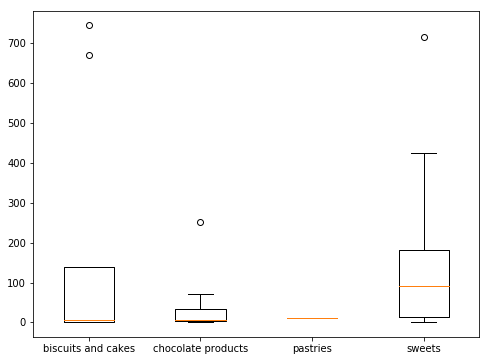

In [44]:
es_content_by_subgroups = {}
for eachgroup in found_es:
    es_content_by_subgroups[eachgroup[0]] = extract_observs(found_es, eachgroup[0], "qnty")
labels, data = [*zip(*es_content_by_subgroups.items())]
plt.figure(figsize=(8, 6))
plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels)
plt.show()

Now we can tell that adding more artificial sweeteners is not related to adding less sugar in pastries. Overall usage of artificial sweeteners is shrunk, according to this boxplot.
The other thing is that nowdays the food industry could use some staff not listed in our most common artificial sweeteners list.

Me, personally prefer a good sweet pastry but let us check what loves some college students in the next dataset.
*I still believe that sugar is the root of every evil.*

### V. Analyzing Consistency of `Food Choices` Dataset

Firstly we want to check if the people in the dataset are not only fatty girly nerds :) and can we trust their judgment. 

We start by presenting distribution in gender and weights. We draw the weights of both genders distribution on a plot. Everything looks ok. Mainly, the boys are heavier than the girls and the amount of weights is situated in the middle of the chart. The range of this dataset cover different groups of eaters. This says not only too thin or too fat individuals. Girls are more as always.

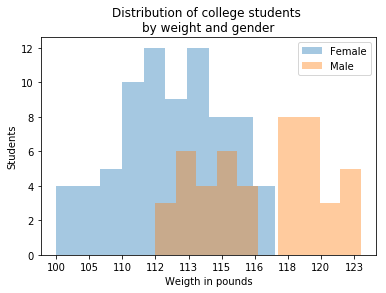

In [45]:
students_weight = students_data[students_data["weight"].notnull()]

fig, ax = plt.subplots(1,1)
plt.hist(students_weight[students_weight.Gender == 1].weight, label = "Female", alpha = 0.4) # Female
plt.hist(students_weight[students_weight.Gender == 2].weight, label = "Male", alpha = 0.4) # Male
ax.set_xticks(ax.get_xticks()[::5])
plt.legend()
plt.title("Distribution of college students \nby weight and gender")
plt.xlabel("Weigth in pounds")
plt.ylabel("Students")
plt.show()

After that these is one other interesting feature to measure the quality of the people in the dataset. In this question people should guess the number of calories in a chicken meal. Everyone in Europe, even Google, knows that chicken piadina calories suppose to be about 720 in portion. We compare their GPA scores in schooling to their accuracy by answering this simple food question. 

To do that we need a little cleaning in the GPA feature. It is an object, but supposed to be float. We clean this. Then we draw a chart. The chart shows smart people are almost smart enough to know the answer of this simple food question.

So we can continue and examine these nice people's choices for comfort food. A comfort food is the closest thing I can imagine to my favorite `sugary snacks`. :)

In [46]:
students_GPA = students_data[students_data["GPA"].notnull()]
students_GPA.GPA.unique()

array(['2.4', '3.654', '3.3', '3.2', '3.5', '2.25', '3.8', '3.904', '3.4',
       '3.6', '3.1', '4', '2.2', '3.87', '3.7', '3.9', '2.8', '3', '3.65',
       '3.89', '2.9', '3.605', '3.83', '3.292', '3.35', 'Personal ',
       '2.6', '3.67', '3.73', '3.79 bitch', '2.71', '3.68', '3.75',
       '3.92', 'Unknown', '3.77', '3.63', '3.882'], dtype=object)

In [47]:
# Use regex to clean blended data, fill missing values and set up dtype
students_data["GPA"] = students_data[students_data["GPA"].notnull()].GPA.str.replace(r'[^\d\.\d+]', '').replace((np.nan, ''), '3.5').astype(float).round(2)

students_GPA = students_data[students_data["GPA"].notnull()]
students_GPA.GPA.unique()

array([2.4 , 3.65, 3.3 , 3.2 , 3.5 , 2.25, 3.8 , 3.9 , 3.4 , 3.6 , 3.1 ,
       4.  , 2.2 , 3.87, 3.7 , 2.8 , 3.  , 3.89, 2.9 , 3.83, 3.29, 3.35,
       2.6 , 3.67, 3.73, 3.79, 2.71, 3.68, 3.75, 3.92, 3.77, 3.63, 3.88])

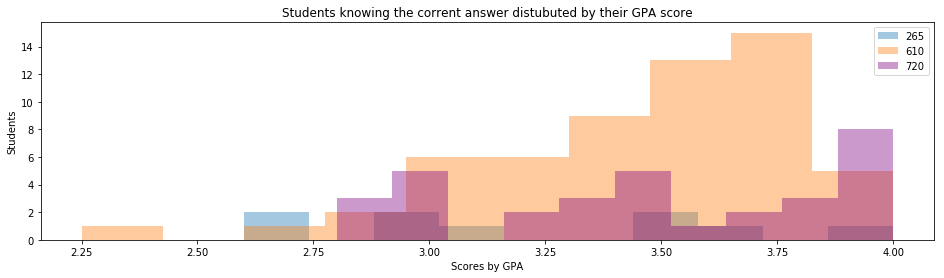

In [48]:
fig, ax = plt.subplots(figsize=[16,4])

plt.hist(students_GPA[students_GPA.calories_chicken == 265].GPA, label = "265", alpha = 0.4) # Female
plt.hist(students_GPA[students_GPA.calories_chicken == 610].GPA, label = "610", alpha = 0.4) # Male
plt.hist(students_GPA[students_GPA.calories_chicken == 720].GPA, label = "720", alpha = 0.4, color="purple") # Male

plt.title("Students knowing the corrent answer distubuted by their GPA score")
plt.xlabel("Scores by GPA")
plt.ylabel("Students")

plt.legend()
plt.show() # correct answer is 720

### VI. Preparing Prefered Comfort Food Data for Further Sugar Contents Analysis

Now we can surely extract people choices for comfort food and do a natural language processing to find out which of them are the most common foods. After that the plan is to compare their **sugar content per 100 g** and to ask a questions **is there any relation between that the more people prefer one food the much more sugar there is it.**

In [49]:
comfort_food = str(students_data.comfort_food.tolist())
stops = set(stopwords.words("english"))
text_words = re.split("\\W+",  comfort_food.lower())
most_common_comfort_food = Counter([w for w in text_words if w not in stops]).most_common(10)

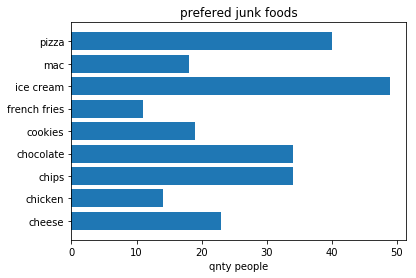

In [50]:
common_comfort_food = []
for i, g in most_common_comfort_food:
    if i == "ice" or i == "n" or i == "french" or i =="food": # skip doubled words
        continue
    else:
        if i == "cream":
            common_comfort_food.append(["ice cream", g])
        elif i == "fries":
            common_comfort_food.append(["french fries", g])
        elif i == "chinese":
            common_comfort_food.append(["chinese food", g])
        else:         
            common_comfort_food.append([i, g])
   
plt.barh(pd.DataFrame(common_comfort_food)[0], pd.DataFrame(common_comfort_food)[1])
plt.title("prefered junk foods")
plt.xlabel("qnty people")
plt.show()

At first look, we can tell that the most loved comfort food **ice cream** contains the most sugars in 100 g. But is the high sugar content makes us love a food more? Will see soon.

In [51]:
common_comfort_food = pd.DataFrame(common_comfort_food)
common_comfort_food.columns = ["food", "qnty"]

In [52]:
def get_mean_sugars_by_food(food):
    return food_data[food_data.product_name.str.contains(food) == True].sugars_100g.mean()

In [53]:
sugars_in_common_comfort_foods = []
for i in common_comfort_food.food:
    sugars_in_common_comfort_foods.append([i, get_mean_sugars_by_food(i)])

In [54]:
sugars_in_common_comfort_foods = pd.DataFrame(sugars_in_common_comfort_foods)

In [55]:
common_comfort_food = pd.concat([common_comfort_food, round(sugars_in_common_comfort_foods[1], 2)], axis = 1)
common_comfort_food.rename(columns={1: 'mean sugars in 100 g'}, inplace=True)

In [56]:
common_comfort_food.drop(8, axis=0, inplace = True) # delete last food because of null observations for sugar content

In [57]:
common_comfort_food

,food,qnty,mean sugars in 100 g
0,ice cream,49,25.18
1,pizza,40,2.76
2,chocolate,34,31.75
3,chips,34,8.15
4,cheese,23,4.85
5,cookies,19,30.65
6,mac,18,16.65
7,chicken,14,3.38


Now, we have the most prefered comfort food of 125 college students and its sugars content. Next step is to find out is there any correlation between this how much loved is one food and this how much sugar is in it.
But since we have one more dataset to dig in let's mine some useful for out survey data and add it to our `common_comfort_food` table.

### VII. Collecting Relevant Data from `Foodborne Disease Outbreaks` Dataset

Here we go through all the dataset and collect cases related to our so far collected most common comfort foods. I wonder if I love one food more does it make me necessary more likely to get sick by eating it.
We continue with adding to our table reported cases of illness and death by consuming certain food.

In [58]:
def get_disease_by_food(food):
    return disease_data[disease_data.Food.str.lower().str.contains(food)== True].Illnesses.mean()

In [59]:
diseases_by_common_comfort_foods = []
for i in common_comfort_food.food:
    diseases_by_common_comfort_foods.append([i, get_disease_by_food(i)])
diseases_by_common_comfort_foods = pd.DataFrame(diseases_by_common_comfort_foods)

In [60]:
common_comfort_food = pd.concat([common_comfort_food, round(diseases_by_common_comfort_foods[1],2)], axis = 1)
common_comfort_food.rename(columns={1: 'mean qnty diseases'}, inplace=True)

In [61]:
common_comfort_food.corr()

,qnty,mean sugars in 100 g,mean qnty diseases
qnty,1.000000,0.169431,-0.610626
mean sugars in 100 g,0.169431,1.000000,0.381252
mean qnty diseases,-0.610626,0.381252,1.000000


In [62]:
def get_deaths_by_food(food):
    return disease_data[disease_data.Food.str.lower().str.contains(food)== True].Fatalities.mean()

In [63]:
deaths_by_common_comfort_foods = []
for i in common_comfort_food.food:
    deaths_by_common_comfort_foods.append([i, get_deaths_by_food(i)])
deaths_by_common_comfort_foods = pd.DataFrame(deaths_by_common_comfort_foods)

In [64]:
common_comfort_food = pd.concat([common_comfort_food, round(deaths_by_common_comfort_foods[1],4)], axis = 1)
common_comfort_food.rename(columns = {1: 'mean qnty deaths'}, inplace = True)
common_comfort_food

,food,qnty,mean sugars in 100 g,mean qnty diseases,mean qnty deaths
0,ice cream,49,25.18,16.33,0.0617
1,pizza,40,2.76,7.91,0.0156
2,chocolate,34,31.75,18.56,0.0000
3,chips,34,8.15,17.03,0.0000
4,cheese,23,4.85,18.92,0.0634
5,cookies,19,30.65,27.03,0.0000
6,mac,18,16.65,36.68,0.0282
7,chicken,14,3.38,17.93,0.0115


### VIII. Forming hypothesis and a try of testing it

Now, when we have all the related data which helps us answer the next question - *Does more sugar make us sicker?*
Correlation coefficient between `mean sugars in 100 g` and `mean qnty diseases` gives us information about a weak uphill (positive) linear relationship. We can tell that **there is probability the more sugar we eat with our comfort food the more likely is to get sick soon or later.**

On the other hand, I see something very interesting. There is a strong downhill (negative) linear relationship between `qnty of people loving this food` and `mean qnty diseases`. This means that **more eaters for a particular comfort food, less caused by it health troubles**. Of course, it is a good idea to test validity of these two statements.

In [65]:
common_comfort_food.corr()

,qnty,mean sugars in 100 g,mean qnty diseases,mean qnty deaths
qnty,1.000000,0.169431,-0.610626,0.248031
mean sugars in 100 g,0.169431,1.000000,0.381252,-0.161227
mean qnty diseases,-0.610626,0.381252,1.000000,-0.029030
mean qnty deaths,0.248031,-0.161227,-0.029030,1.000000


#### Testing Hypothesis
##### Relation between `mean sugars in 100 g` and `mean qnty diseases`

Is sugars related to diseases? To what extent? Is it significant?
* $H_0$: No relation between Sugars and Diseases
* $H_1$: Some relation exists between Sugars and Diseases
* $\alpha = 0,05$

In [66]:
ttest_ind(common_comfort_food["mean sugars in 100 g"], common_comfort_food["mean qnty diseases"])

Ttest_indResult(statistic=-0.8742882885510564, pvalue=0.39671170882425855)

In [67]:
sugars_rating = pd.crosstab(common_comfort_food["mean sugars in 100 g"], common_comfort_food["mean qnty diseases"])
chi2, pvalue, dof, expected = st.chi2_contingency(sugars_rating)
pvalue

0.2288519727170065

`pvalue` is more than 0.05 so sadly there is no reason to reject $H_0$.

##### Relation  between `qnty of people loving this food` and `mean sugars in 100 g`

Is sugars related to how much we love a food? To what extent? Is it significant?
* $H_0$: No relation between Sugars and peoples love
* $H_1$: Some relation exists between Sugars and peoples love
* $\alpha = 0,05$

In [71]:
ttest_ind(common_comfort_food["mean sugars in 100 g"], common_comfort_food["qnty"])

Ttest_indResult(statistic=-2.1875901164777054, pvalue=0.04616085994377278)

In [72]:
sugars_rating = pd.crosstab(common_comfort_food["mean sugars in 100 g"], common_comfort_food["qnty"])
chi2, pvalue, dof, expected = st.chi2_contingency(sugars_rating)
pvalue

0.24263868733675567

`pvalue` is more than 0.05 so sadly there is no reason to reject $H_0$.

##### Relation  between `qnty of people loving this food` and `mean qnty diseases`

Is Food Rating related to diseases? To what extent? Is it significant?
* $H_0$: No relation between Food Rating and Diseases
* $H_1$: Some relation exists between Food Rating and Diseases
* $\alpha = 0,05$

In [68]:
ttest_ind(common_comfort_food["qnty"], common_comfort_food["mean qnty diseases"])

Ttest_indResult(statistic=1.6741646766950173, pvalue=0.11628329428973744)

In [69]:
sugars_rating = pd.crosstab(common_comfort_food["qnty"], common_comfort_food["mean qnty diseases"])
chi2, pvalue, dof, expected = st.chi2_contingency(sugars_rating)
pvalue

0.24263868733675567

`pvalue` is more than 0.05 so sadly there is no reason to reject $H_0$.

## Conclusions and Summary
We didn't make any brake through on the scientific food horizon today but we did a lot of hard work in this survey. We fulfilled all the steps for a good data science study. We analysed the sugar content in many of preferred comfort foods and made some good graphs.

We found that cakes doesn't contains so much sugars nor artificial sweeteners as we expected. Also we found out that college students love at first place ice cream and pizza, who doesn't? We didn't found any significant relation between sugar content diseases and how much people love a comfort food.

Of course, there is still a lot of chemical ingredients in our favorite comfort food to go through out and how knows... May be next time we will find significant relation between diseases and food content or between fav food ratings and its chemical composition.

This notebook still provides good functions to look into upper presented Kaggle dataset. Next researchers could use them.

## References
1. [How to draw a boxplot from a dictionary - Stack Overflow article](https://stackoverflow.com/questions/47657651/boxplot-from-dictionary-with-different-length)
2. [E Number Index for Sweeteners](http://www.sugar-and-sweetener-guide.com/e-number-index-for-sweeteners.html)
2. [Chicken Piadina Calories ](https://www.google.com/search?q=chicken+piadina+calories+&ie=utf-8&oe=utf-8&client=firefox-b-ab)
3. [Chicken Piadina Recipe - in Saveur magazine](https://www.saveur.com/article/Recipes/Piadina-Romagnola-Romagnolan-Flatbread)
4. Soft Uni Maths Cours:
    * Lecture: Hypothesis Testing Exercise
    * Lecture: Latex  Syntax
5. [Kaggle How much sugar, additives, and salt do we eat Notebook](https://www.kaggle.com/bhouwens/how-much-sugar-do-we-eat)
6. [Kaggle Food Choices Notebook](https://www.kaggle.com/borapajo/some-basic-stats-t-test-spearman-s-r)
6. [Kaggle Open Food Facts Notebook](https://www.kaggle.com/nadiinchi/visualizing-data)